In [ ]:
import pandas as pd

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from scipy import stats
import seaborn as sns

In [4]:
# find runs that evolved multicellularity or didn't complete
dirname = "/home/austin/research/rogue_cell/1082"

fname = "/output.txt"


curFile = open(dirname + fname, 'r')
cur_rep = ""
num_rep = 0
mcs = []
dnfs = []

for line in curFile:
    if line.strip(): 
        splitLine = line.strip().split()
        
        if (splitLine[0] == "==>"): 
            rep = splitLine[1]
            cur_rep = rep.split("/")[1]
            cur_rep = cur_rep.replace("a_", "")
            
            num_rep += 1
        else: 

            if (float(splitLine[6]) >= 2): 
                print ("Multicellular: " +  cur_rep)
                int_rep = int(cur_rep)
                mcs.append(int_rep)


            elif (splitLine[0] != "1999900"): 
                print ("Did not finish: " + cur_rep + " " + splitLine[0])
                int_rep = int(cur_rep)
                dnfs.append(int_rep)
            
print("Number of reps: " + str(num_rep))
print("# Multicellular: " + str(len(mcs)))
mcs.sort()
print(mcs)
print("DNFS: " + str(len(dnfs)))
dnfs.sort()
print(dnfs)


FileNotFoundError: [Errno 2] No such file or directory: '/home/austin/research/rogue_cell/1082/output.txt'

In [5]:
#dirname = ""
max_soma_means = []
max_overwritten_means = []

# Load file (i think this is the one you sent me on slack from rogue 3)
fname =  dirname + "birth_tracking.dat"

try: 
    df = pd.read_table(fname, delim_whitespace=True, index_col=False)
    
    # create a new column 'mean_soma_num' based on mean_pop_num and mean_germ_num
    df['mean_soma_num'] = df['mean_pop_num'] - df['mean_germ_num']
    
    # create a new column 'mean_num_overwritten' based on mean_mc_tissue_births & mean_multicell_size
    df['mean_num_overwritten'] = df['mean_mc_tissue_births'] - df['mean_multicell_size'] + 1
    
    # create a new column 'mean_births_per_cell' based on mean_multicell_size & mean_mc_tissue_births
    df['mean_births_per_mc_cell'] = df['mean_mc_tissue_births'] / df['mean_multicell_size'] 
    
except: 
    print ("failed : " + fname)

# Look at dataframe
df = df[['update', 'mean_rep_time', 'mean_res', 'mean_multicell_size',
       'mean_mc_tissue_births', 'mean_num_overwritten', 'mean_births_per_mc_cell', 'mean_germ_num', 'mean_soma_num', 'mean_pop_num',
       'mean_germ_percent', 'mean_germ_workload', 'mean_germ_workload_var',
       'mean_soma_workload', 'mean_soma_workload_var', 'replication_count',
       'mean_uni_rep_time', 'mean_uni_workload', 'mean_mc_rep_time',
       'mean_mc_workload', 'num_uni', 'num_multi', 'num_uni_repro',
       'num_multi_repro', 'mean_uni_index', 'mean_multi_index', 'num_orgs',
       'mean_generation']]
df.tail(15)

failed : /home/austin/research/rogue_cell/1082birth_tracking.dat


NameError: name 'df' is not defined

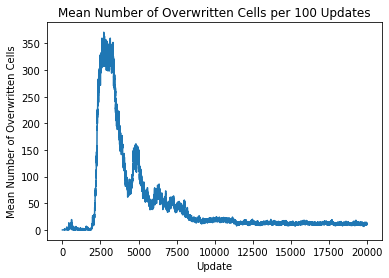

In [6]:
plt.plot(df['mean_num_overwritten'])
plt.xlabel('Update')
plt.ylabel('Mean Number of Overwritten Cells')
plt.title('Mean Number of Overwritten Cells per 100 Updates')
plt.show()

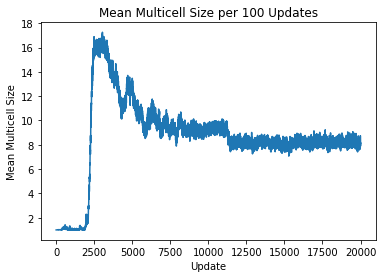

In [7]:
plt.plot(df['mean_multicell_size'])
plt.xlabel('Update')
plt.ylabel('Mean Multicell Size')
plt.title('Mean Multicell Size per 100 Updates')
plt.show()

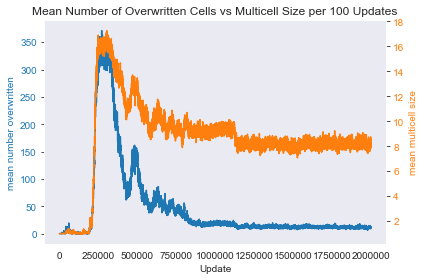

In [8]:
#https://matplotlib.org/gallery/api/two_scales.html
sns.set_style('dark')
# create an axis using subplots and plot the first variable
fig, ax1 = plt.subplots()
ax1.set_xlabel('Update')
ax1.set_ylabel('mean number overwritten', color='tab:blue')
ax1.plot(df['update'], df['mean_num_overwritten'], color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()  # makes a second y axis with the same x-axis

# use the second axis to plot the second variable
ax2.set_ylabel('mean multicell size', color='tab:orange')
ax2.plot(df['update'], df['mean_multicell_size'], color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')
plt.title('Mean Number of Overwritten Cells vs Multicell Size per 100 Updates')
fig.tight_layout()
plt.show()

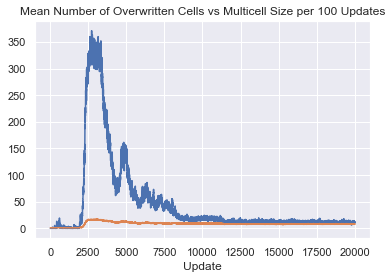

In [9]:
# old nontwo scaled code
sns.set()
plt.plot(df['mean_num_overwritten'], label='mean number overwritten')
plt.plot(df['mean_multicell_size'], label='mean multicell size')
plt.xlabel('Update')
# plt.ylabel('Mean Number of Overwritten Cells')
plt.title('Mean Number of Overwritten Cells vs Multicell Size per 100 Updates')
plt.show()

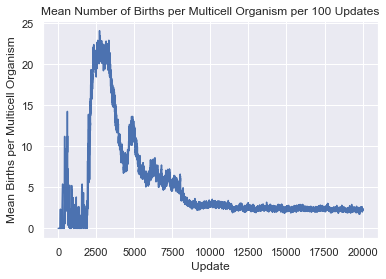

In [10]:
# multicell births over time standard plot
plt.plot(df['mean_births_per_mc_cell'])
plt.xlabel('Update')
plt.ylabel('Mean Births per Multicell Organism')
plt.title('Mean Number of Births per Multicell Organism per 100 Updates')
plt.show()

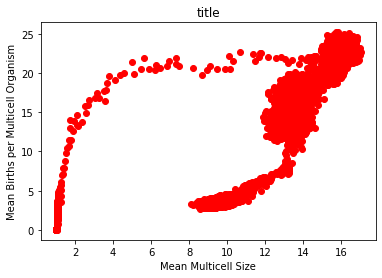

In [11]:
plt.plot(df['mean_multicell_size'], df['mean_births_per_mc_cell'], 'ro')
plt.xlabel('Mean Multicell Size')
plt.ylabel('Mean Births per Multicell Organism')
plt.title('title')
plt.show()

In [3]:
# code to copy specific columns and get rid of zeros for later manipulation
workload = df['mean_mc_workload']
rep_time = df['mean_mc_rep_time']
truth = np.zeros_like(workload)
for i in range(len(workload)):
    if workload[i]>0 and rep_time[i]>0:
        truth[i]=1
workload = workload[truth==1]
rep_time = rep_time[truth==1]
print(len(workload),len(rep_time)) # check to make sure they are still the same length


18176 18176


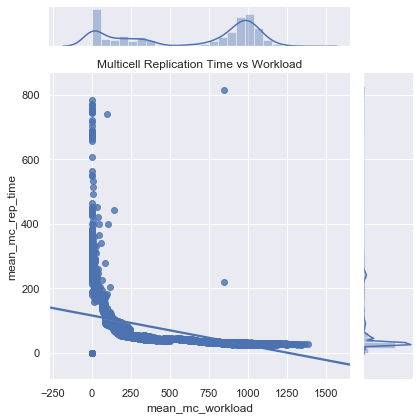

In [12]:
# seaborn jointplot with automated linear regression and histograms
workload = df['mean_mc_workload']
rep_time = df['mean_mc_rep_time']
sns.jointplot(workload,rep_time,kind = 'reg')
plt.title('Multicell Replication Time vs Workload')
plt.tight_layout()

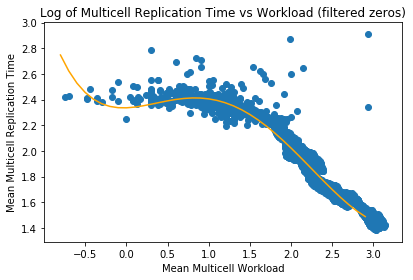

In [9]:
# standard plot of scaled down variable with 5th order polynomial fit
params = np.polyfit(np.log10(workload),np.log10(rep_time),5)
repfunc = np.poly1d(params)
arr = np.arange(-.8,3,0.1)
plt.plot(arr,repfunc(arr),color = 'orange')

plt.scatter(np.log10(workload),np.log10(rep_time))
plt.title('Log of Multicell Replication Time vs Workload (filtered zeros)')
plt.xlabel('Mean Multicell Workload')
plt.ylabel('Mean Multicell Replication Time')
plt.tight_layout()

Germ Cell Number vs Multicell Workload


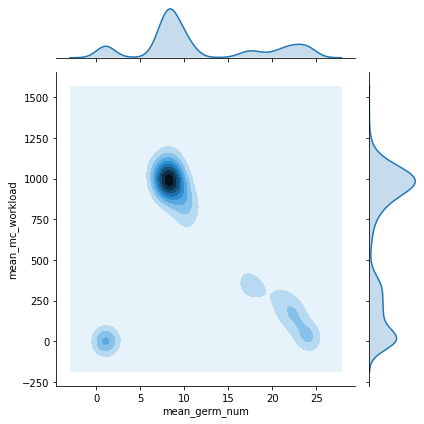

In [11]:
# clustered seaborn jointplot
workload = df['mean_mc_workload']
germs = df['mean_germ_num']

print('Germ Cell Number vs Multicell Workload')
sns.jointplot(germs,workload,kind='kde')

plt.tight_layout()